# Random Walk

### Índice
1. [Primeiro caso de teste](#Primeiro-caso-de-teste)<br>
    1.1. [Resultados do Primeiro Caso de Teste](#Resultados-do-Primeiro-Caso-de-Teste)<br>
2. [Segundo caso de teste](#Segundo-caso-de-teste)<br>
    2.1. [Resultado do Segundo Caso de Teste](#Resultado-do-Segundo-Caso-de-Teste)<br>
3. [Terceiro caso de teste](#Terceiro-caso-de-teste)<br>
    3.1. [Resultados do Terceiro Caso de Teste](#Resultados-do-Terceiro-Caso-de-Teste)

In [1]:
pathFileImages = 'C:/Users/julia/TOPICOS ESPECIAIS EM COMPUTAÇAO/'

from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

### Funções usadas no código

In [2]:
def criaPop(tamanho,dim):
    return np.random.uniform(0 , 1 , size = (tamanho,dim))

#funções de conversão de população para as faixas de cada caso de teste
def converter1(pop):
    lb = [-3,-2,0]
    ub = [3,4,6]
    x = lb[0]+(ub[0]-lb[0])*pop[:,:1]
    y = lb[1]+(ub[1]-lb[1])*pop[:,1:2]
    z = lb[2]+(ub[2]-lb[2])*pop[:,2:]

    popconv = np.append(x.reshape(-1, 1), y.reshape(-1, 1), axis=1)
    popconv = np.append(popconv, z.reshape(-1, 1), axis=1)
    return popconv

def converter2(palavra):
    lb = min(palavraAlvo)
    ub = max(palavraAlvo)
    novaPalavra =[]
    for i in palavra:
        novaPalavra=np.append(novaPalavra,lb + (ub - lb) * i)
    return novaPalavra

def converter3(pop):
    lb = -5.12
    ub = 5.12
    novaPop = []
    for i in pop:
        novaPop.append(lb + (ub - lb) * i)
    return np.array(novaPop)

#função fitness 1
def f(x,y,z):
    return 10 * (x - 1)**2 + 20 * (y - 2)**2 + 30 * (z - 3)**2

#função fitness 2
def diferenca(p1,p2):
    diferenca = np.array([])
    for i,j in zip(p1,p2):
        diferenca=np.append(diferenca,((i - j)**2))
    return diferenca

#função fitness 3
def rastrigin(x):
    fit=[]
    for i in range(len(x)):
        n=10 * dim_3 + (x[i]**2 - (10 * math.cos(2 * math.pi * x[i])))
        fit.append(n)
    return fit

def estagnacao(fitAnt, fitAtual):
    return abs(fitAnt-fitAtual)/fitAtual


### Definição das populações

In [3]:
#primeiro caso de teste
n_pop = 50
dim = 3

#segundo caso de teste
tamanho_2 = 30
dim_2 = 1

#terceiro caso de teste
tamanho_3 = 100
dim_3 = 2

## Primeiro caso de teste

In [4]:
#população inicial (primeira geração)
pop=criaPop(n_pop,dim)

In [5]:
#converter para as faixas do primeiro caso de teste
pop=converter1(pop)


In [6]:
#fitness
pop = np.append(pop,(f(pop[0:,0:1],pop[0:,1:2],pop[0:,2:])).reshape(-1, 1), axis=1)


In [7]:
#ordenação
pop_ord = pop[(pop[0:, -1]).argsort()]


In [8]:
#50% melhores
melhor_pop_inicial = pop_ord[0:int(n_pop/2),:]


In [9]:
#contagem de população estagnada
cont = 0
delta = 0.01
sem_evoluir = 100
i_desejadas = 5

In [10]:
tabela = pd.DataFrame()

for j in range(i_desejadas):

    melhor_i=[]

    for i in range(sem_evoluir):
        #segunda geracao
        if i==0:
            nova_melhor_pop = melhor_pop_inicial.copy()

            #novos 50% da população
            nova_pop = criaPop(int(n_pop/2),dim)

            #converter para as faixas
            nova_pop = converter1(nova_pop)

            #fitness da nova população
            nova_pop = np.append(nova_pop,(f(nova_pop[0:,0:1],nova_pop[0:,1:2],nova_pop[0:,2:])).reshape(-1, 1), axis=1)

            #melhor 50% pop anterior + 50% nova população
            nova_melhor_pop = np.append(nova_melhor_pop,(nova_pop),axis= 0)

            #reordena
            melhor_pop = nova_melhor_pop[(nova_melhor_pop[0:, -1]).argsort()]

            #melhor fit dessa geração
            melhor_i.append(melhor_pop[0:1,-1])
            
        #gerações posteriores
        elif i>0:
            nova_melhor_pop = melhor_pop[0:int(n_pop/2),:]

            nova_pop = criaPop(int(n_pop/2),dim)

            nova_pop = converter1(nova_pop)

            nova_pop = np.append(nova_pop,(f(nova_pop[0:,0:1],nova_pop[0:,1:2],nova_pop[0:,2:])).reshape(-1, 1), axis=1)

            nova_melhor_pop = np.append(nova_melhor_pop,(nova_pop),axis= 0)

            melhor_pop = nova_melhor_pop[nova_melhor_pop[0:, -1].argsort()]

            melhor_i.append(melhor_pop[0:1,-1])

            evolucao = estagnacao(melhor_i[i-1],melhor_i[i])

            if evolucao <= delta:
                cont += 1

            elif evolucao > delta:
                cont=0

            elif sem_evoluir == cont:
                continue

    tabela = pd.concat([tabela, pd.DataFrame(melhor_i)], axis=1)

#media e desvio padrao dos fits
desvioP = np.std(tabela,axis=1)
media = np.mean(tabela,axis=1)
desvioSup = media + desvioP
desvioInf = media - desvioP
tabela

,0,0,0,0,0
0,8.145115,8.145115,8.145115,8.145115,8.145115
1,8.145115,8.145115,8.145115,8.145115,6.788926
2,1.637312,8.145115,8.145115,8.145115,6.788926
3,1.637312,8.145115,8.145115,8.145115,6.788926
4,1.637312,8.145115,8.145115,8.145115,6.788926
...,...,...,...,...,...
95,0.546888,0.508606,0.717919,1.232787,0.467168
96,0.546888,0.508606,0.717919,1.232787,0.467168
97,0.546888,0.508606,0.717919,1.232787,0.467168
98,0.546888,0.508606,0.717919,1.232787,0.467168


In [11]:
#plt.title("Média de Fitness Por Geração")
#plt.xlabel("Geração")
#plt.ylabel("Média e Desvio Padrão de Fitness")
#plt.plot(media, color = "red", label = "Média")
#plt.fill_between(range(len(media)), desvioSup, desvioInf, facecolor='red', alpha=0.3, label ='Desvio padrão')
#plt.grid(True)
#plt.legend()
#plt.show()
#print('\nNúmero de iterações para a última convergência: ',i+1)

## Resultados do Primeiro Caso de Teste

### População de tamanho 10

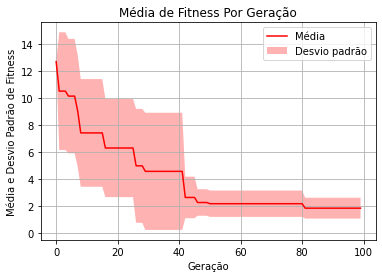

In [12]:
Image(filename = pathFileImages + '1 Caso de teste - pop10.png')

### População de tamanho 50

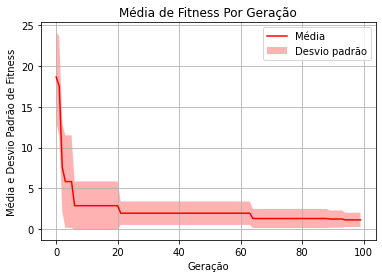

In [13]:
Image(filename = pathFileImages + '1 Caso de teste - pop50.png')

### População de tamanho 100

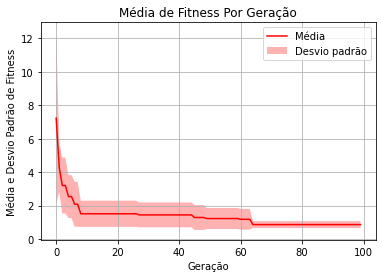

In [14]:
Image(filename = pathFileImages + '1 Caso de teste - pop100.png')

[Início](#Índice)

## Segundo caso de teste

In [15]:
palavraAlvo = np.array([
52.547,
72.154,
53.694,
57.771,
115.88,
105.59,
75.368,
126.02,
52.756,
85.100,
80.525,
111.24,
113.62,
64.95,
89.181,
85.647,
101.71,
106.75,
110.37,
72.082,
104.38,
102.41,
63.009,
59.52,
89.869,
126.78,
77.231,
96.821,
67.905,
110.1])

In [16]:
#palavra aleatoria
palavra = [converter2(criaPop(tamanho_2,dim_2))]


In [17]:
#palavra + fitness
palavra.append(diferenca(palavraAlvo,palavra))
palavra = np.array(palavra).T


In [18]:
#ordenação e poda
palavra_ord = palavra[(palavra[0:, -1]).argsort()]
melhor_palavra_inicial = palavra_ord[0:int(tamanho_2/2),:]


In [19]:
#contagem de geração estagnada
cont = 0
delta = 0.01
sem_evoluir = 100
i_desejadas = 5

In [20]:
tabela2 = pd.DataFrame()
for j in range(i_desejadas):

    melhor_i=[]

    for i in range(sem_evoluir):
        
        if i==0:
            nova_melhor_pop = melhor_palavra_inicial.copy()

            nova_pop = criaPop(int(tamanho_2/2),dim_2)

            nova_pop = converter2(nova_pop)

            nova_pop = np.c_[nova_pop,(diferenca(palavraAlvo,nova_pop))] #troca f

            nova_melhor_pop = np.append(nova_melhor_pop,(nova_pop),axis= 0)

            melhor_pop = nova_melhor_pop[nova_melhor_pop[0:, -1].argsort()] 

            melhor_i.append(melhor_pop[0:1,-1])
            
        elif i>0:
            nova_melhor_pop = melhor_pop[0:int(tamanho_2/2),:]

            nova_pop = criaPop(int(tamanho_2/2),dim_2)

            nova_pop = converter2(nova_pop) 

            nova_pop = np.c_[nova_pop,(diferenca(palavraAlvo,nova_pop))]

            nova_melhor_pop = np.append(nova_melhor_pop,(nova_pop),axis= 0)

            melhor_pop = nova_melhor_pop[nova_melhor_pop[0:, -1].argsort()]

            melhor_i.append(melhor_pop[0:1,-1])

            evolucao = estagnacao(melhor_i[i-1],melhor_i[i])

            if evolucao <= delta:
                cont += 1

            elif evolucao > delta:
                cont=0

            elif sem_evoluir == cont:
                continue

    tabela2 = pd.concat([tabela2, pd.DataFrame(melhor_i)], axis=1)

#media e desvio padrao dos fits
desvioP2 = np.std(tabela2,axis=1)
media2 = np.mean(tabela2,axis=1)
desvioInf2 = media2 - desvioP2
desvioSup2 = media2 + desvioP2

tabela2

,0,0,0,0,0
0,0.958282,0.958282,0.958282,0.958282,0.000208
1,0.958282,0.958282,0.958282,0.958282,0.000208
2,0.874198,0.562686,0.469995,0.958282,0.000208
3,0.874198,0.562686,0.469995,0.862163,0.000208
4,0.273245,0.266425,0.469995,0.862163,0.000208
...,...,...,...,...,...
95,0.002286,0.009255,0.004838,0.000125,0.000208
96,0.002286,0.009255,0.004838,0.000125,0.000208
97,0.002286,0.009255,0.004838,0.000125,0.000208
98,0.002286,0.009255,0.004838,0.000125,0.000208


In [21]:
#plt.title("Média de Fitness Por Geração")
#plt.xlabel("Geração")
#plt.ylabel("Média e Desvio Padrão de Fitness")
#plt.plot(media2, color = "green", label = "Média")
#plt.fill_between(range(len(media2)), desvioSup2, desvioInf2, facecolor='green', alpha=0.3, label ='Desvio padrão')
#plt.grid(True)
#plt.legend()
#plt.show()
#print('\nNúmero de iterações para a última convergência: ',i+1)

## Resultado do Segundo Caso de Teste

### População padrão: 30 indivíduos

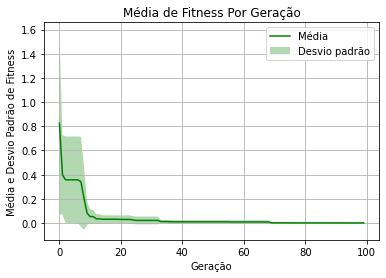

In [22]:
Image(filename = pathFileImages + '2 Caso de teste - pop30.png')

[Início](#Índice)<br>

## Terceiro caso de teste

In [23]:
pop_3 = criaPop(tamanho_3,dim_3)
pop_3 = pop_3.T

In [24]:
pop3 = converter3(pop_3)
for i in pop3:
    p=rastrigin(i)
p=np.array(p)

In [25]:
#pop add fitness
pop_3 = pop_3.T
pop_3 = np.append(pop_3,p.reshape(-1,1),axis=1)


In [26]:
#ordenação e poda
pop3 = pop_3[abs(pop_3[0:,-1]).argsort()] 
melhor_pop3_inicial= pop3[0:int(tamanho_3/2),:] 


In [27]:
#contagem de geração estagnada
cont = 0
delta = 0.01
sem_evoluir = 100
i_desejadas = 5

In [28]:
tabela3 = pd.DataFrame()

for j in range(i_desejadas):

    melhor_i=[]

    for i in range(sem_evoluir):
        
        if i==0:
            nova_melhor_pop = melhor_pop3_inicial.copy()

            nova_pop = np.array(criaPop(int(tamanho_3/2),dim_3)).T
            
            nova_pop = converter3(nova_pop)

            for i in nova_pop:
                fit=rastrigin(i)
            fit=np.array(fit)
            
            nova_pop=nova_pop.T
            nova_pop=np.c_[nova_pop,fit.T]
            
            nova_melhor_pop = np.append(nova_melhor_pop,(nova_pop),axis= 0)
            
            melhor_pop = nova_melhor_pop[abs(nova_melhor_pop[0:, -1]).argsort()]
            
            melhor_i.append(melhor_pop[0:1,-1])
            
        elif i>0:
            nova_melhor_pop = melhor_pop[0:int(tamanho_3/2),:]

            nova_pop = np.array(criaPop(int(tamanho_3/2),dim_3)).T
            
            nova_pop = converter3(nova_pop)

            for k in nova_pop:
                fit=rastrigin(k)
            fit=np.array(fit)
            
            nova_pop=nova_pop.T
            nova_pop=np.c_[nova_pop,fit.T]
            
            nova_melhor_pop = np.append(nova_melhor_pop,(nova_pop),axis= 0)
            
            melhor_pop = nova_melhor_pop[abs(nova_melhor_pop[0:, -1]).argsort()]
            
            melhor_i.append(melhor_pop[0:1,-1])
            
            evolucao = estagnacao(melhor_i[i-1],melhor_i[i])
            
            if evolucao <= delta:
                cont += 1

            elif evolucao > delta:
                cont=0

            elif sem_evoluir == cont:
                continue

    tabela3 = pd.concat([tabela3, pd.DataFrame(melhor_i)], axis=1)

#media e desvio padrao dos fits
desvioP3 = np.std(tabela3,axis=1)
media3 = np.mean(tabela3,axis=1)
desvioInf3 = media3 - desvioP3
desvioSup3 = media3 + desvioP3

tabela3

,0,0,0,0,0
0,11.070510,11.070510,10.050701,11.030352,11.070510
1,10.676744,11.070510,10.050701,10.136103,11.005137
2,10.676744,11.070510,10.050701,10.136103,11.005137
3,10.502159,10.011792,10.050701,10.136103,11.005137
4,10.456254,10.011792,10.050701,10.136103,11.005137
...,...,...,...,...,...
95,10.000668,10.000014,10.000002,10.000703,10.003080
96,10.000668,10.000014,10.000002,10.000703,10.003080
97,10.000668,10.000014,10.000002,10.000703,10.003080
98,10.000668,10.000014,10.000002,10.000703,10.003080


In [29]:
#plt.title("Média de Fitness Por Geração")
#plt.xlabel("Geração")
#plt.ylabel("Média e Desvio Padrão de Fitness")
#plt.plot(media3, color = "blue", label = "Média")
#plt.fill_between(range(len(media3)), desvioSup3, desvioInf3, facecolor='blue', alpha=0.3, label ='Desvio padrão')
#plt.grid(True)
#plt.legend()
#plt.show()
#print('\nNúmero de iterações para a última convergência: ',i+1)

## Resultados do Terceiro Caso de Teste

### População de tamanho 10

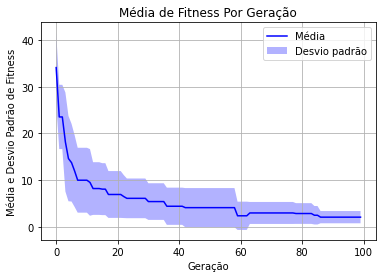

In [30]:
Image(filename = pathFileImages + '3 Caso de teste - pop10.png')

### População de tamanho 50

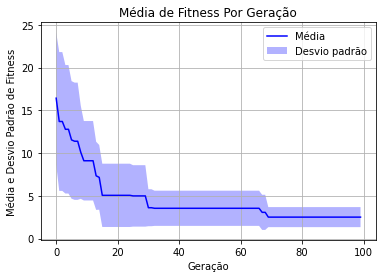

In [31]:
Image(filename = pathFileImages + '3 Caso de teste - pop50.png')

### População de tamanho 100

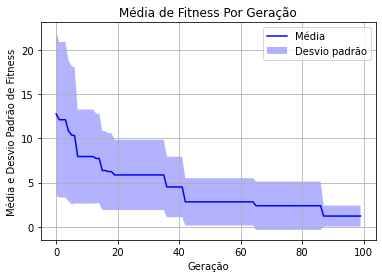

In [32]:
Image(filename = pathFileImages + '3 Caso de teste - pop100.png')

[Início](#Índice)<br>